In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections  as mc
import math

In [2]:
#Funciones Auxiliares
def sumaV(x,y):
    '''Suma 2 vectores dados'''
    a,b=x
    c,d=y
    return (a+c,b+d)
def multV(n,a):
    '''Multiplica un vector a por una constante n'''
    a1,a2 = a
    return (a1*n,a2*n)
def rota(vect, theta):
    '''Rota un vector en un ángulo en Theta grados'''
    ang = float((theta/180.0)*math.pi)
    (x,y) = vect
    vr = ((math.cos(ang)*x)-(math.sin(ang)*y), (math.sin(ang)*x)+(math.cos(ang)*y))
    return vr

In [3]:
class Atomo:
    '''Clase que define un atomo en el sistema'''
    def __init__(self, pos, color='black'):
        '''Inicializa el objeto Atomo usando como entradas su posición (x,y) pos y su color caracteristico color'''
        self.pos = pos
        self.color = color
        self.enlaces = []

    def printAtomo(self, r, axs):
        '''Imprime un Atomo en un Patch en el axs señalado'''
        axs.add_patch(plt.Circle((self.pos), r , color=self.color))

    def setEnlace(self, atm):
        '''Enlaza 2 Atomos'''
        self.enlaces.append(atm)
        atm.enlaces.append(self)
        return 1


In [4]:
class Malla:
    '''Define una malla bidimencional formada por 2 vectores dados
Variables de Malla:
   u -> vector constructor u.
   v -> vector constructor v.
   theta -> ángulo de rotación de la malla.
   red -> lista con las pociciones de los puntos que caracterizan a cada celda de la malla.
   atms -> lista de todos los átomos en la malla
   enls -> lista de los enlaces entre átomos en la malla
   aPos -> lista auxiliar con las posiciones de todos los átomos.
   aColor -> lista auxiliar con los colores de todos los átomos.
'''
    def __init__(self, u, v, theta = 0.0):
        if theta==0.0:
            self.u = u
            self.v = v
        else:
            self.u = rota(u,theta)
            self.v = rota(v,theta)
        self.theta = theta
        self.red = []
        self.atms = []
        self.enls = []
        self.aPos, self.aCol = [], []

    def printWeb(self, axs):
        '''Imprime la red de simetrias de la malla'''
        if self.red == []: 
            print("Aun no se ha creado una red, use el método creaNM(n,m)")
            return
        lis = np.array(self.red)
        xs, ys = lis[:,0], lis[:,1]        
        mx = np.amax(xs)
        my = np.amax(ys)
        axs.set(xlim=(-mx,mx), ylim = (-my,my))
        plt.scatter(xs, ys,s=10)
    
    def creaNM(self, n, m):
        '''Crea una red que se repite n veces en el vector u y m en el vector v en ambas direcciones'''
        red = []
        for i in range((2*n)+1):
            a = i-n
            for j in range((2*m)+1):
                b = j-m
                p = sumaV((multV(a,self.u)), (multV(b,self.v)))
                self.red.append(p)
        return self.red

    def creaAtomos(self, nAtms, colors=['blue','blue']):
        '''Crea la lista de los Átomos que están en la malla. La variable nAtms indica el numero de atomos en cada celda de la malla.
Si la variable nAtms es 1 entonces se forma una estructura de cuadrada.
Si la variable nAtms es 2 entonces se forma una estructura de exagonal.'''
        if nAtms == 1:#Crea una red de atomos con patrones cuadrados
            u = multV((1/2),self.u)
            v = multV((1/2),self.v)
            for p in self.red:
                p1 = sumaV(p,sumaV(u,v))
                self.atms.append(Atomo(p1,colors[0]))
                self.aPos.append(p1)
                self.aCol.append(colors[0])
                p2 = sumaV(p1, self.u)
                p3 = sumaV(p1, self.v)
                self.enls.append([p1,p2])
                self.enls.append([p1,p3])
            return 1
        if nAtms == 2:#Crea una red de atomos con patrones exagonales 
            u = multV((1/3),self.u)
            v = multV((1/3),self.v)
            for p in self.red:
                p1 = sumaV(p,sumaV(u,v))
                p2 = sumaV(p,multV(2,sumaV(u,v)))
                self.atms.append(Atomo(p1,colors[0]))
                self.aPos.append(p1)
                self.aCol.append(colors[0])
                self.atms.append(Atomo(p2,colors[1]))
                self.aPos.append(p2)
                self.aCol.append(colors[1])
                p3 = sumaV(p,sumaV(multV(2,v),multV((-1),u)))
                p4 = sumaV(p,sumaV(u,multV(4,v)))
                self.enls.append([p1,p2])
                self.enls.append([p1,p3])
                self.enls.append([p2,p4])
            return 1
        self.atms, self.enls = [], []
        self.aPos, self.aCol = [], []
        return 0
    
    def crea(self, n, m, nAtms, colors=['blue','blue']):
        '''Crea una red n*m y sus atomos'''
        self.creaNM(n,m)
        self.creaAtomos(nAtms, colors)


In [5]:
def muestra(mallas, t = 0.5, name = ''):
    '''Impime en pantalla la lista de Mallas dadas, puede señalarse un grosor de dibujo t y un nombre name
De tener nombre se creará una imagén con dicho nombre'''
    fig, axs = plt.subplots()
    atms, enls, col = [], [], []
    i = 0
    for m in mallas:
        i+=1
        print("Malla",i,":",len(m.aPos),"atomos,",len(m.enls),"enlaces")
        atms = atms+m.aPos
        col = col+m.aCol
        enls = enls+m.enls
    print("\tTotal:",len(atms),"atomos,",len(enls),"enlaces")
    lis = np.array(atms)
    xs, ys = lis[:,0], lis[:,1]
    axs.scatter(xs,ys, color=col,s=t)
    lc = mc.LineCollection(np.array(enls), colors='black', linewidths=(t/10))
    axs.add_collection(lc)
    #axs.axes.xaxis.set_visible(False)
    #axs.axes.yaxis.set_visible(False)
    axs.autoscale_view(tight=False)
    if name!='':
        plt.savefig(name,dpi=900, bbox_inches='tight')
    plt.show()
    axs.cla()
    plt.clf()
    plt.close()
    return 1

In [6]:
#Creamos una Red exagonal regular usando los vectores u=(l*sqrt(3),l) y v=(l*sqrt(3),-l) 
l = 2
h = l*math.sqrt(3)
malla1 = Malla((h,-l),(h,l))
malla1.crea(10,10,2,colors=['red','darkgreen']);

Malla 1 : 882 atomos, 1323 enlaces
	Total: 882 atomos, 1323 enlaces


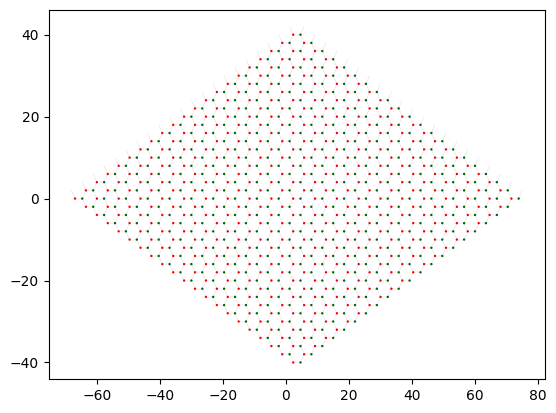

1

In [7]:
muestra([malla1],name='ejemplo1.png')

In [8]:
#Creamos una red cuadrada
malla2 = Malla((2,1),(-2,1))
malla2.crea(20,20,1);

Malla 1 : 1681 atomos, 3362 enlaces
	Total: 1681 atomos, 3362 enlaces


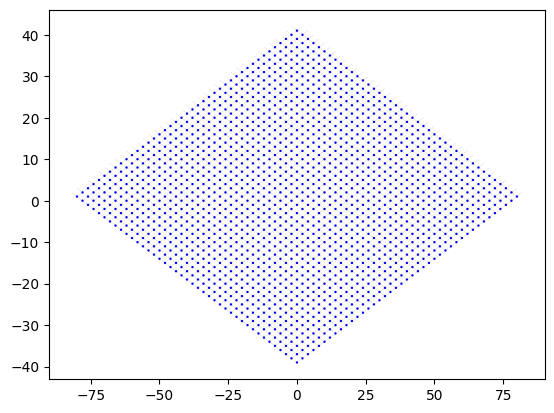

1

In [9]:
muestra([malla2],name='ejemplo2.png')

Malla 1 : 882 atomos, 1323 enlaces
Malla 2 : 1681 atomos, 3362 enlaces
	Total: 2563 atomos, 4685 enlaces


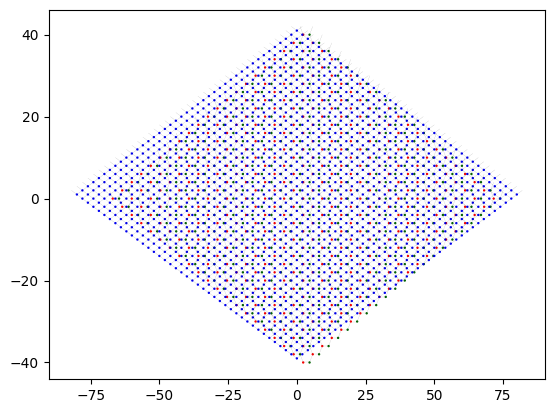

1

In [10]:
#Mostramos un empalme de las 2 redes anteriores
muestra([malla1,malla2],t=0.5,name='ejemplo3.png')

In [11]:
#Creamos la misma red del primer ejemplo pero rotada 45º
malla3 = Malla((h,-l),(h,l),theta=45)
malla3.crea(10,10,2,colors=['darkred','green']);

Malla 1 : 882 atomos, 1323 enlaces
	Total: 882 atomos, 1323 enlaces


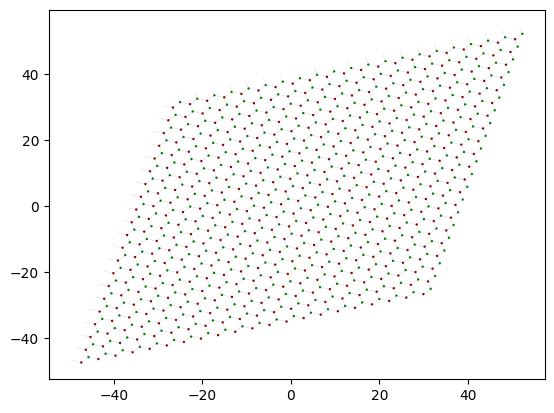

1

In [12]:
muestra([malla3],name='ejemplo4.png')

Malla 1 : 882 atomos, 1323 enlaces
Malla 2 : 882 atomos, 1323 enlaces
	Total: 1764 atomos, 2646 enlaces


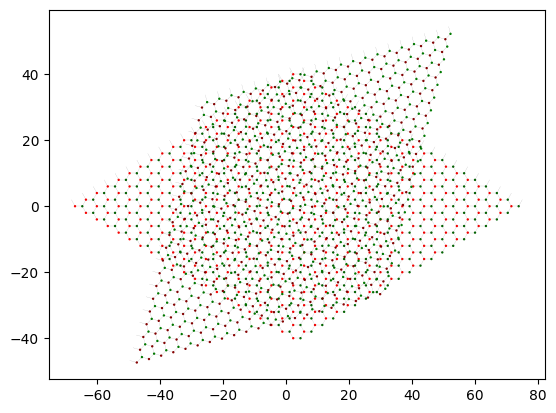

1

In [13]:
#Mostramos el empalme de la primer red con su rotada
muestra([malla1,malla3],t=0.5,name='ejemplo5.png')

In [14]:
#Rotamos la primer red 90º
malla4 = Malla((h,-l),(h,l),theta=90)
malla4.crea(10,10,2,colors=['yellow','brown']);

Malla 1 : 882 atomos, 1323 enlaces
Malla 2 : 882 atomos, 1323 enlaces
	Total: 1764 atomos, 2646 enlaces


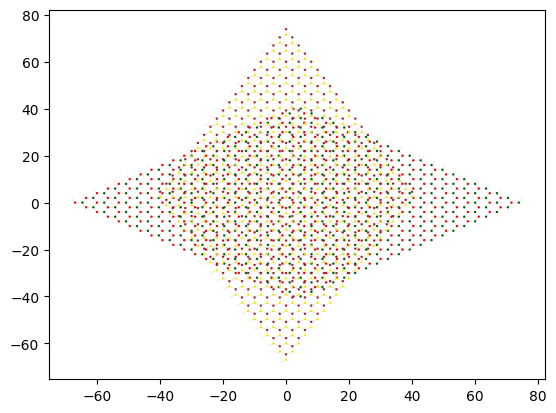

1

In [15]:
#Mostramos el empalme de la primer red con su rotada en 90º
muestra([malla1,malla4],t=0.5,name='ejemplo6.png')